<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/1--wnF2vQE2nDQ8rC8iMa2A2Sk1tNwPwz/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII_a.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>

---
    
# <strong>Los datos hablan II</strong>

In [ ]:
!pip install APIMakeSens

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
from MakeSens import MakeSens

warnings.filterwarnings('ignore')

## **Estuandiando el material particulado**

Vamos a analizar la variación del de material particulado, $PM_{1}$, $PM_{2.5}$ y $PM_{10}$, a lo largo del día.

In [41]:
fecha_inicio = "2023-08-14 00:00:00"
fecha_fin = "2023-09-17 23:59:00"
estacion = "mE1_00008"                      # FCUIS
frecuencia = "1H"

data = MakeSens.download_data(estacion, fecha_inicio, fecha_fin, frecuencia)

### **1. Limpiando datos**

Para que sea un poco más sencillo manejar nuestros datos, definiremos un nuevo DataFrame para almacenar solo con las variables de material particulado. Luego convertiremos el índice de los datos a formato de fecha y hora con la función ```to_datetime()```.

In [42]:
# Definimos un nuevo Dataset con las variables que nos interesa
pm_data = data[["pm10_1", "pm10_2","pm25_1", "pm25_2", "pm1_1", "pm1_2", 'ts']]

pm_data = pm_data.set_index('ts')

# Cambiar índice a formato datetime
pm_data.index = pd.to_datetime(pm_data.index)

In [43]:
pm_data.head(4)

,pm10_1,pm10_2,pm25_1,pm25_2,pm1_1,pm1_2
ts,,,,,,
2023-08-14 00:00:00,9.000000,8.517241,8.172414,8.103448,6.137931,5.655172
2023-08-14 01:00:00,12.344828,11.517241,11.034483,10.896552,7.827586,7.758621
2023-08-14 02:00:00,11.900000,10.900000,10.900000,10.066667,7.733333,6.933333
2023-08-14 03:00:00,10.413793,9.275862,9.344828,9.034483,6.793103,6.137931


Antes de empezar a manipular los datos, debemos preguntarnos:

> ¿Qué vamos a analizar? ¿Qué queremos saber de los datos? ¿Qué fenómeno queremos estudiar?

Ahora, demos un vistazo a los datos. Veamos, por ejemplo, cómo se comporta el $PM_{10}$ a lo largo del día.

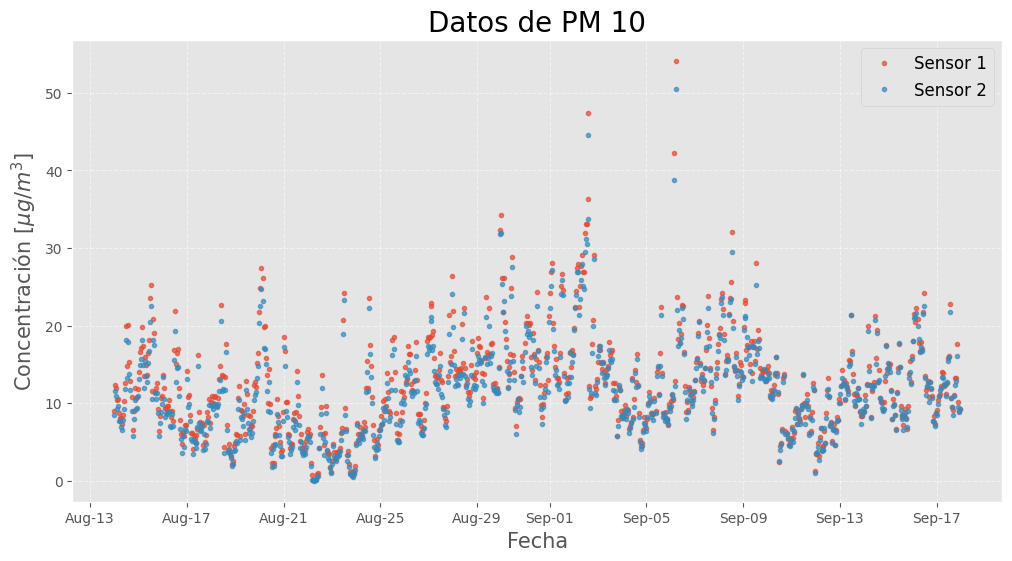

In [44]:
# Graficamos pm10 
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(pm_data.index, pm_data['pm10_1'], '.',label = 'Sensor 1', alpha=0.7)
plt.plot(pm_data.index, pm_data['pm10_2'], '.',label = 'Sensor 2', alpha=0.7)

# Configuramos etiquetas
plt.title("Datos de PM 10", fontsize=20)
plt.xlabel("Fecha",         fontsize=15)
plt.ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
plt.grid(alpha=0.5, linestyle="--")
plt.legend(fontsize=12)
plt.show()


**¿Podemos sacar conclusiones con los datos así? ¿Qué piensas que debemos hacer con estos datos, antes de empezar a analizarlos?**

Es necesario eliminar los valores excesivamente altos, también llamados ***datos atípicos*** o ***outliers***. Estos valores pueden ser causados por errores en los sensores o por **eventos extraordinarios**, como incendios o eventos climáticos.

<div class="alert alert-block alert-info">
¿Por qué 120? Escogiendo el valor de corte El valor de 120 es un valor arbitrario. En la práctica, el valor de corte se define de acuerdo a la distribución de los datos. Por ejemplo, si los datos tienen una distribución normal, se puede definir como el valor promedio más 3 veces la desviación estándar. Es importante saber escoger el valor de corte, ya que si se escoge muy bajo se puede perder información importante, y si se escoge muy alto, se pueden introducir errores en el análisis.
</div>  


**Limpiamos los datos**

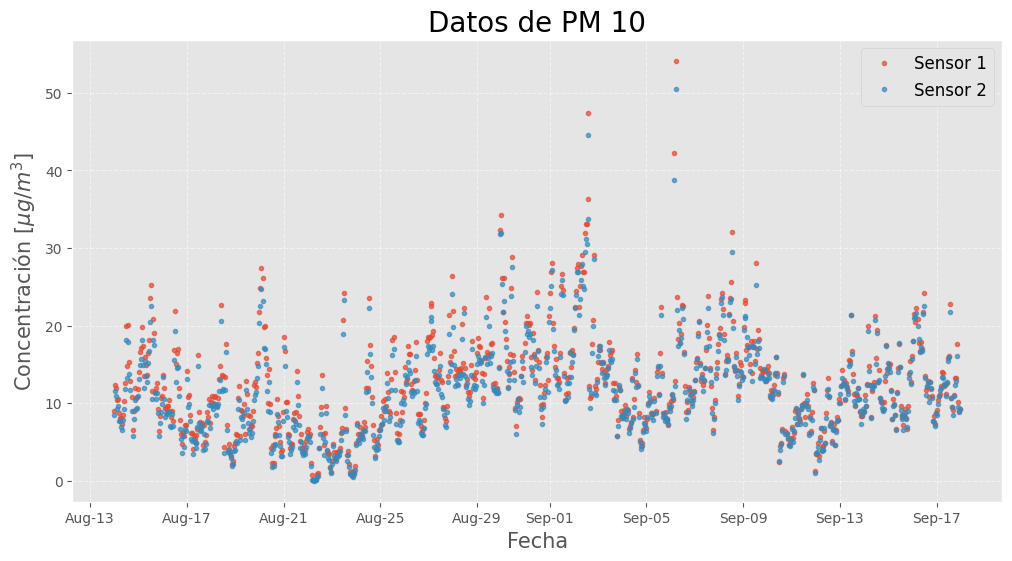

In [45]:
columnas = pm_data.columns #Guardamos los nombres de las columnas en una lista

for columna in columnas:                                            # Iteramos entre cada columna
    # Reemplazamos los valores mayores a 120 por NaN
    pm_data[columna] = pm_data[columna].where(pm_data[columna]<120, np.nan) 

#volvamos a ver cómo se ven los datos:
# Graficamos pm10 
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(pm_data.index, pm_data['pm10_1'], '.',label = 'Sensor 1', alpha=0.7)
plt.plot(pm_data.index, pm_data['pm10_2'], '.',label = 'Sensor 2', alpha=0.7)

# Configuramos etiquetas
plt.title("Datos de PM 10", fontsize=20)
plt.xlabel("Fecha",         fontsize=15)
plt.ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
plt.grid(alpha=0.5, linestyle="--")
plt.legend(fontsize=12)
plt.show()

### **2. Media móvil**

Ya hemos eliminado los datos atípicos, sin embargo, mirando los datos es difícil ver la tendencia. Para arreglar esto, suavicemos  las curvas. Debemos realizar un cálculo de la media móvil, esto lo hacemos mediante la funciones ```.rolling()```  y ```.mean()``` de Pandas.

<div class="alert alert-block alert-info">
<b>¿Qué es la media móvil?</b>  Una **media móvil** es una técnica de suavizado de datos que se utiliza para analizar datos que **fluctúan con el tiempo**. En este caso, la media móvil se calcula en una ventana de tiempo, y se desplaza a lo largo de los datos.
  
 **¿Cómo se calcula la media móvil?** 
La media móvil se calcula como el promedio de los datos en la ventana de tiempo. Por ejemplo, si la ventana de tiempo es de 3 horas, la media móvil en el tiempo $t$ se calcula como: $$\frac{PM_{10}(t-1) + PM_{10}(t) + PM_{10}(t+1)}{3}$$

 A diferencia de otros métodos de suavizado, como el promedio, la media móvil nos permite ver la **tendencia de los datos**, sin **perder información** sobre los picos y valles. Ahí radica su utilidad e importancia.
</div>  


La función ```.rolling()``` proporciona **ventanas deslizantes** sobre los datos. En estas ventanas resultantes, podemos realizar cálculos utilizando una función estadística (en este caso, la media). El tamaño de la ventana (número de períodos o cantidad de datos) se puede especificar en el argumento ```window```.

> Antes de usar la función ```.rolling()```, debes tener claro cual es el fenomeno que quieres estudiar y su escala de tiempo típica. Recuerdas que el ancho de la ventana que vas a usar, depende fuertemente de esto.

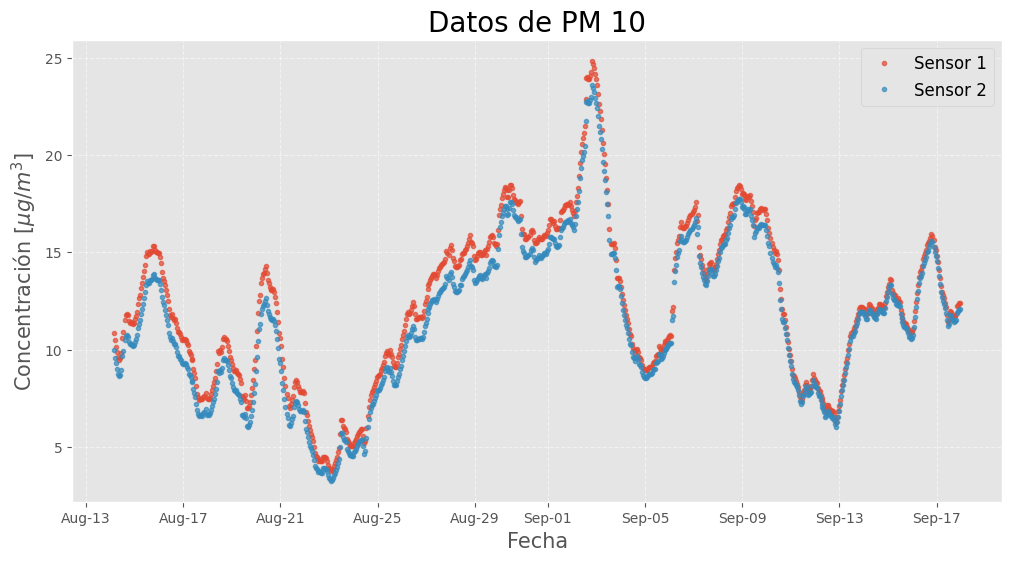

In [46]:
#Calculemos la media móvil de 24 horas para cada sensor
for col in columnas:
    pm_data[col+'_r'] = pm_data[col].rolling(window=24, min_periods=5).mean()

#Ahora volvamos a graficar nuestros datos
# Graficamos pm10 
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
plt.plot(pm_data.index, pm_data['pm10_1_r'], '.',label = 'Sensor 1', alpha=0.7)
plt.plot(pm_data.index, pm_data['pm10_2_r'], '.',label = 'Sensor 2', alpha=0.7)

# Configuramos etiquetas
plt.title("Datos de PM 10", fontsize=20)
plt.xlabel("Fecha",         fontsize=15)
plt.ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
plt.grid(alpha=0.5, linestyle="--")
plt.legend(fontsize=12)
plt.show()

Dado que los datos están registrados por hora, el argumento ```window=24```, que toma 24 datos, corresponde a una ventana de 24 horas. ¿Qué pasa si usamos una ventana de 12 horas? ¿Y si usamos una ventana de 3 horas?

> Hemos eliminado los valores atípicos y suavizado los datos. ¿Qué más podemos hacer para mejorar el análisis?

### **3. Visualización de datos**

Veamos qué más podemos hacer con los datos. De momento, vamos a promediar los datos utilizando la función ```.resample()``` de Pandas. Esta función nos permite agrupar los datos por intervalos de tiempo. En este caso, vamos a agrupar los datos cada 3 días. La diferencia entre ```.resample()``` y ```.rolling()``` es que ```.resample()``` agrupa los datos en **intervalos de tiempo**, mientras que ```.rolling()``` agrupa los datos en **ventanas de tiempo.** 

> ¿Qué diferencia hay entre agrupar los datos en intervalos de tiempo y agruparlos en ventanas de tiempo?

In [47]:
#Establecer frecuencia
dat = pm_data.resample('3D').mean()

#Calcular desviación estandar
dat2 = pm_data.resample('3D').std()

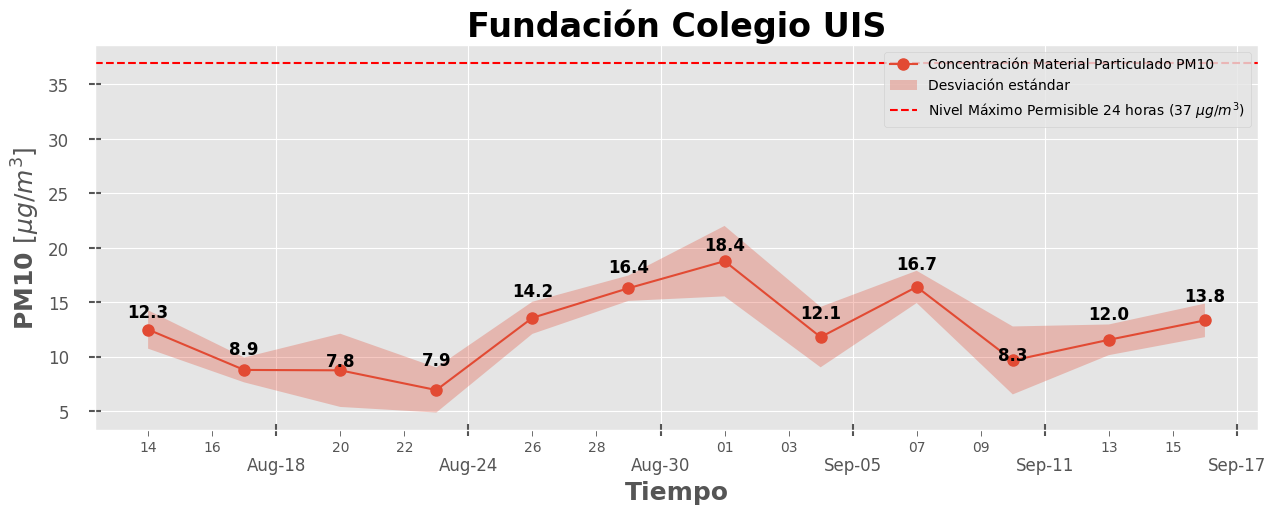

In [48]:
#The recommendation of WHO is 25 μg/m3 daily average, 35 μg/m3 by US EPA, and 50 μg/m3 by Vietname Environmental Administration
# Crear gráfico
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

## Usando rolling y resample
plt.plot(dat.index, dat['pm10_1_r'], '-o', label='Concentración Material Particulado PM10', markersize=8)
plt.fill_between(dat.index, y1 = dat['pm10_1_r']-dat2['pm10_1_r'], y2 = dat['pm10_1_r'] + dat2['pm10_1_r'], alpha=0.3,label='Desviación estándar')

## Usando solo resample
#plt.plot(dat.index, dat['pm10_1'],   '-o', label='Concentración Material Particulado PM10', markersize=5, alpha=0.5)
#plt.fill_between(dat.index, y1 = dat['pm10_1']-dat2['pm10_1'],     y2 = dat['pm10_1'] + dat2['pm10_1'],     alpha=0.2, label='Desviación estándar')

## Nivel máximo permisible
plt.axhline(y=37, color='r', linestyle='--', label='Nivel Máximo Permisible 24 horas (37 $\mu g /m^3$)')

# Añadir etiquetas con valores en cada punto
for x, y in zip(dat.index, dat.pm10_1):
    plt.text(x, y+1, f"{y:.1f}", ha="center", va="bottom", #ha: alineamiento horizontal, va: alineamiento vertical
            fontsize=12, fontweight="bold")

plt.legend(loc='upper right')

# Configurar títulos y etiquetas de los ejes
plt.title("Fundación Colegio UIS", fontsize=24, fontweight="bold")
plt.xlabel("Tiempo", fontsize=18, fontweight="bold")
plt.ylabel("PM10 $[\mu g / m^3]$", fontsize=18, fontweight="bold")

# Personalizar el formato de las etiquetas del eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=2))
ax.tick_params(which='major', pad=15, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
plt.show()

En este **ejemplo**, hemos graficado la variación del $PM_{10}$ a lo largo de los días. La zona sombreada hace referencia a la desviación estándar de los datos.

Ahora bien, es importante saber aplicar los conocimientos que hemos adquirido del lenguaje de programación. Para facilitar el trabajo, podemos crear **funciones** que nos ayuden a realizar **tareas repetitivas**. En este caso, podemos crear una función que nos permita **graficar** la **variación de los datos** a lo largo del día.

In [49]:
#Podemos hacer funciones para reducir el trabajo
def grafica(ax,dat,dat_std,columna,label,titulo,xlabel,ylabel,y_max, color=['blue','red'],alpha=0.5,unit_text=1,locator='day'):
    """
    @params
        ax : axis
             Eje de una figura
        dat : dataframe
              Set de datos
        dat_std : dataframe
              Set de datos de desviación estándar
        columna : str
                  Nombre de la columna de datos
        label : str
                Etiqueta del conjunto de datos
        titulo : str
                 Nombre del título del grafico
        xlabel : str
                 Etiqueta eje x
        ylabel : str
                 Etiqueta eje y
    @ejemplo
        >> fig, ax = plt.subplots(figsize=(12,6))
        >> label = 'Concentración Material Particulado PM2.5'
        >> titulo = 'Instituto Técnico Damazo Zapata'
        >> xlabel = 'Tiempo'
        >> ylabel = 'PM2.5 $[\mu g / m^3]$'
        >> grafica(ax, dat, dat_std, 'pm25_1_AE', label, titulo,xlabel,ylabel)
        >> plt.show()
    """

    ## Graficar datos 
    ax.plot(dat.index, dat[columna], '-o', label=label, color=color[0])
    ax.fill_between(dat.index, dat[columna]+dat_std[columna],dat[columna]-dat_std[columna],alpha=alpha,color=color[1],label='Desviación estándar')

    ## Agregar etiquetas a cada punto de datos
    for x, y in zip(dat.index, dat[columna]): 
        plt.text(x, y+unit_text, f"{y:.1f}", ha="center", va="bottom", #ha: alineamiento horizontal, va: alineamiento vertical
                fontsize=12, fontweight="bold") 

    ## Configurar título, etiquetas, leyenda y límite del eje 'y'
    ax.set_title(titulo,  fontsize=20, fontweight="bold")     # Titulo
    ax.set_xlabel(xlabel, fontsize=15, fontweight="bold")     # Etiqueta eje x
    ax.set_ylabel(ylabel, fontsize=15, fontweight="bold")     # Etiqueta eje y
    
    ## Configurar límites y escalas de los ejes 
    dat_min = (dat[columna]-dat_std[columna]).min()  # Mínimon valor del grafico
    dat_max = (dat[columna]+dat_std[columna]).max()  # Máximo valor del grafico
    if dat_min>0: 
        dat_min*=0.9
    else: 
        dat_min*=1.1
    ax.set_ylim(dat_min, dat_max*1.1)                # Límites eje y
    if dat_max*1.1 > y_max:                       # Graficamos la línea de nivel máximo permisible solo si está por debajo del valor máximo de la gráfica
        plt.axhline(y=y_max, color='r', linestyle='--', label="Nivel Máximo Permisible 24 horas ({} $\mu g /m^3$)".format(y_max)) # Línea horizontal
    ax.legend(loc='upper right')

    ## Convertir las fechas de las etiquetas del eje x a formato Mes-día
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    if locator=='day':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    if locator=='month':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.tick_params(which='major', pad=15, length=8, labelsize=12, direction="inout", width=1.5)
    ax.tick_params(which='minor', length=4)

Una vez hemos creado nuestra función, podemos utilizarla para graficar la variación de los datos de $PM_{1}$, $PM_{2.5}$ y $PM_{10}$ a lo largo del mes.

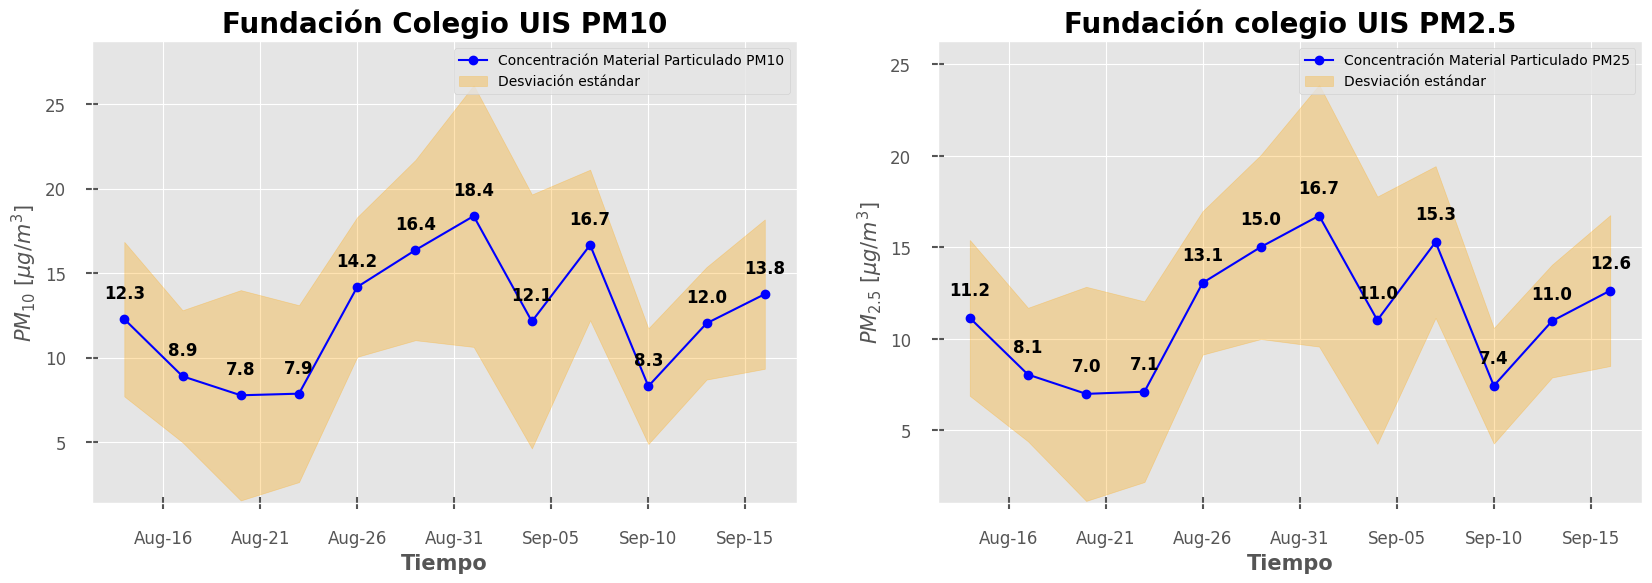

In [50]:
# Probemos la función que hemos creado
fig = plt.subplots(figsize=(20,6))

ax = plt.subplot(121)
label = 'Concentración Material Particulado PM10'
titulo = 'Fundación Colegio UIS PM10'
xlabel = 'Tiempo'
ylabel = '$PM_{10} ~ [\mu g / m^3]$'
alpha=0.3
color=["Blue", "Orange"]
y_max = 37

grafica(ax, dat, dat2,'pm10_1', label, titulo,xlabel,ylabel, y_max, color,alpha)

ax = plt.subplot(122)
titulo = 'Fundación colegio UIS PM2.5'
label = 'Concentración Material Particulado PM25'
ylabel = '$PM_{2.5}~[\mu g / m^3]$'
y_max = 37

grafica(ax, dat, dat2,'pm25_1', label, titulo,xlabel,ylabel, y_max, color,alpha)
ax.axhline(y=37, color='r', linestyle='--', label="Nivel Máximo Permisible 24 horas (37 $\mu g /m^3$")
plt.show()

#### Sub-gráficas
Tenemos tres tipos de material particulado, cada uno de ellos medidos con dos sensores. Debemos  saber si los dos sensores de cada tipo de material particulado miden lo mismo. Para esto, realizaremos un promedio entre dichas medidas usando ```.mean()``` y ```.resample()``` de Pandas.

In [51]:
# Sacamos un promedio de los datos de los sensores para cada tipo de partícula
pm_data_mean = pd.DataFrame()
pm_data_mean["PM_1"] = pm_data[["pm1_1_r", "pm1_2_r"]].mean(axis=1)
pm_data_mean["PM_25"] = pm_data[["pm25_1_r", "pm25_2_r"]].mean(axis=1)
pm_data_mean["PM_10"] = pm_data[["pm10_1_r", "pm10_2_r"]].mean(axis=1)

Vamos a crear una ***gráfica*** compuesta de ***4 subgráficas***, una para cada tipo de material particulado y una última donde se muestren los datos de los 3 tipos de material particulado con la función ```.subplots()``` de Matplotlibs. A continuación, graficaremos el **material particulado promedio** por hora, por día y el material particulado registrado por cada sensor.



In [52]:
## Elegir estilo
plt.style.use('ggplot')

## Elegir estilo aleatoriamente
#estilos = plt.style.available
#import random
#estilo = random.choice(estilos)
#plt.style.use(estilo)
#print('Estas usando el estilo: '+estilo)

> ¿Qué pasa si cambiamos el estilo de la gráfica? Puedes conocer cuáles estilos están disponibles revisando en la [**documentación.**](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

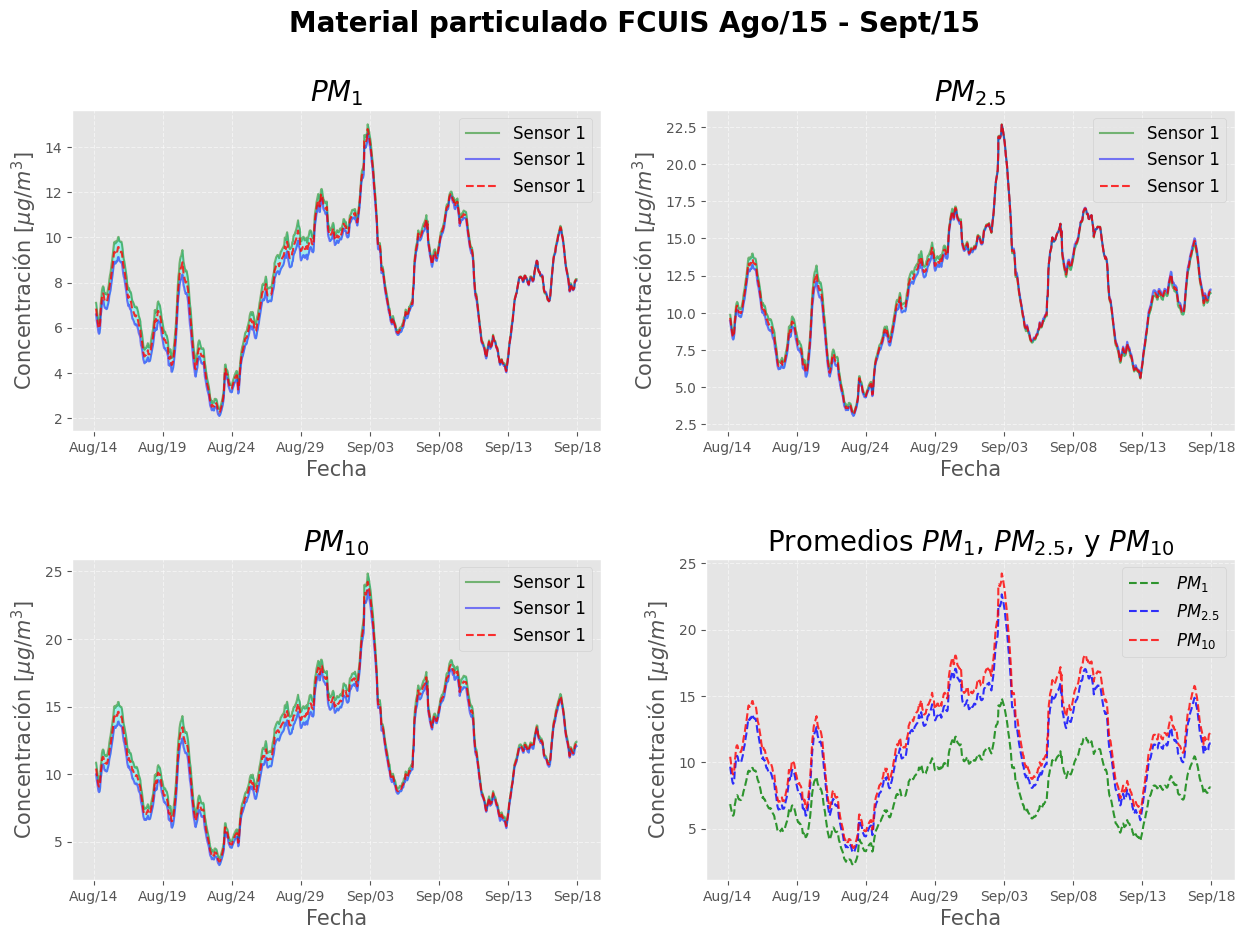

In [53]:
#Creamos una figura con 4 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Dejamos un poco más de espacio entre los subplots
fig.subplots_adjust(hspace=0.4)

#Definimos una función de gráfica
def grafica(ax, columnas, labels):
    ax.plot(pm_data[columnas[0]],      label=labels[0], alpha=0.5, color="green")
    ax.plot(pm_data[columnas[1]],      label=labels[0], alpha=0.5, color="blue")
    ax.plot(pm_data_mean[columnas[2]], label=labels[0], alpha=0.8, color="red", linestyle="--")
    ax.fill_between(pm_data.index, pm_data[columnas[0]], pm_data[columnas[1]], color='cyan', alpha=0.3)
    
def ajusta_etiquetas(ax,titulo):
    ax.set_title(titulo, fontsize=20)
    ax.set_ylabel(r"Concentración [$\mu g/m^3$]", fontsize=15)
    ax.set_xlabel("Fecha", fontsize=15)
    ax.grid(alpha=0.5, linestyle="--")
    ax.legend(fontsize=12,loc='upper right')

## Graficamos los datos de PM 1
grafica(ax[0,0],columnas=['pm1_1_r','pm1_2_r','PM_1'],labels=['Sensor 1', 'Sensor 2', 'Promedio'])
ajusta_etiquetas(ax[0,0], r'$PM_{1}$')

## Graficamos los datos de PM 2.5
grafica(ax[0,1],columnas=['pm25_1_r','pm25_2_r','PM_25'],labels=['Sensor 1', 'Sensor 2', 'Promedio'])
ajusta_etiquetas(ax[0,1], r'$PM_{2.5}$')

## Graficamos los datos de PM 10
grafica(ax[1,0],columnas=['pm10_1_r','pm10_2_r','PM_10'],labels=['Sensor 1', 'Sensor 2', 'Promedio'])
ajusta_etiquetas(ax[1,0], r'$PM_{10}$')

## Graficamos los promedios de los datos de PM 1, 2.5 y 10
ax[1,1].plot(pm_data_mean.PM_1, label=r"$PM_{1}$", alpha=0.8, color="green", linestyle="--")
ax[1,1].plot(pm_data_mean.PM_25, label=r"$PM_{2.5}$", alpha=0.8, color="blue", linestyle="--")
ax[1,1].plot(pm_data_mean.PM_10, label=r"$PM_{10}$", alpha=0.8, color="red" , linestyle="--")
ajusta_etiquetas(ax[1,1], r'Promedios $PM_{1}$, $PM_{2.5}$, y $PM_{10}$')

## Formateamos el eje de las fechas para los 4 subplots
for i in range(2):
    for j in range(2):
        ax[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b/%d'))
        ax[i,j].xaxis.set_major_locator(mdates.DayLocator(interval=5))
        #ax[i,j].xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,6)))
        #ax[i,j].tick_params(which='major', pad=15, length=8, labelsize=12, direction="inout", width=1.5)
        #ax[i,j].tick_params(which='minor', length=4)
plt.suptitle('Material particulado FCUIS Ago/15 - Sept/15',fontsize=20, fontweight="bold")
plt.show()

Ahora que tenemos nociones de cómo se comporta el material particulado, surgen ciertas preguntas:
- ¿Por qué el $PM_{1}$ es menor que el $PM_{2.5}$ y el $PM_{10}$?
- ¿Qué pasa con el material particulado en la noche?
- ¿Se comportará igual durante todo el mes o solo se trata de un caso particular?

Procedamos a realizar un análisis de los datos de material particulado por día de la semana:

## **¿La concentración de material particulado cambia los fines de semana?**

Vamos a comparar la concentración de material particulado $PM_{2.5}$, durante los días de semana (lunes a viernes) con los fines de semana (sábado y domingo). Antes de empezar, es crucial tomarnos un tiempo para pensar en el problema que queremos resolver y el resultado que esperamos obtener para así tener una nocion de lo que estamos haciendo. Por ejemplo, ¿Esperamos que la concentración de material particulado aumente o disminuya los fines de semana?

### Vistazo rápido a los datos

Usemos la función ```.dayofweek``` de Pandas para obtener el día de la semana de cada medición. Luego, usando la función ```.scatter()``` de Matplotlib, grafiquemos la concentración de material particulado $PM_{2.5}$ en función del día de la semana. ¿Qué observamos?

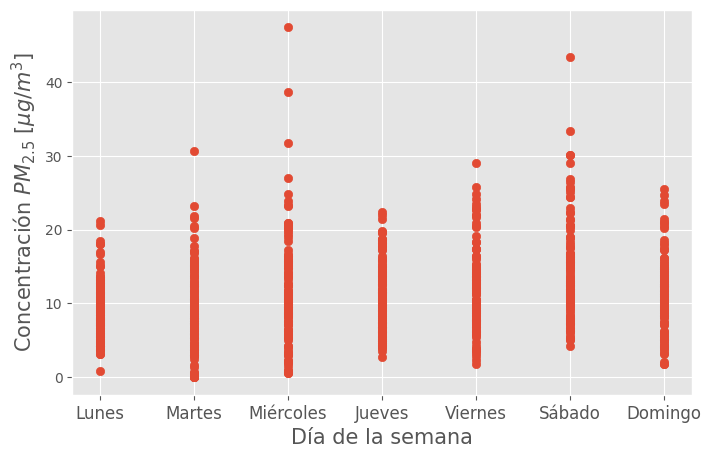

In [54]:
# Demos una vista rápida de como se agrupan nuestro datos para cada día de la semana. 
# Ten en cuenta que 0:Lunes y 6:Domingo.

plt.figure(figsize=(8,5))
plt.scatter(pm_data.index.dayofweek, pm_data.pm25_1)
plt.xticks(range(7), ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], fontsize=12)

plt.ylabel(r"Concentración $PM_{2.5}$ [$\mu g/m^3$]", fontsize=15)
plt.xlabel(r"Día de la semana", fontsize=15)
plt.show()

Podemos ver que la mayoría de los datos mantienen una concentración menor a $40 \mu g/m^3$. ¿Qué pasa con los datos de los fines de semana? ¿Son mayores o menores que los de los días de semana? Para sacar una conclusión más profunda, debemos realizar un análisis estadístico de los datos.

### **Análisis estadístico**
Ya que estamos interesados en comparar la concentración de PM$_{2.5}$ entre días de la semana, vamos a trabajar con el promedio para cada día. 

#### **1ra forma**

In [98]:
## Datos diarios
pm_d = pm_data.resample('D').mean()            # Datos diarios
pm_d['semana'] = pm_d.index.isocalendar().week # Columna semana del año
pm_d['dia'] = pm_d.index.isocalendar().day     # Columna día del año

## Columna EnSemana
EnSemana = pm_d['dia'].values
for i in range(len(EnSemana)):
    if EnSemana[i] in [1,2,3,4,5]:
        EnSemana[i] = 1
    else:
        EnSemana[i] = 0
pm_d['en_semana'] = pd.Series(EnSemana, index=pm_d.index)
del pm_d['dia']

## Agrupar por semana y por EnSemana
pm_week_mean = pm_d.groupby(['semana','en_semana']).mean()

## Calcular ratios
columnas = pm_week_mean.columns  # Columnas
semanas = pm_d.semana.unique()   # Semanas

# Eliminamos semanas incompletas
if 0 not in list(pm_week_mean.loc[semanas[-1]].index):
    semanas = semanas[:-2]
if 1 not in list(pm_week_mean.loc[semanas[0]].index):
    semanas = semanas[1:] 
 
Ratios = {}
for col in columnas:
    Ratios[col] = []
for semana in semanas:
    for col in columnas:
        Ratios[col].append((pm_week_mean.loc[semana,0] / pm_week_mean.loc[semana,1])[col])
Ratios = pd.DataFrame(Ratios,index=semanas)

## Columna de fechas
import datetime
date = []
for s in semanas:
    date.append(datetime.date.fromisocalendar(2023, s, 1))
Ratios['date'] = pd.to_datetime(date)
# Ratios

#### **2da forma**

Vamos a dividir nuestro DataFrame en varios DataFrame, cada uno para una semana diferente. Para esto, usaremos el método de python ```isocalendar()```, el cual devuleve el año, número de la semana y día. Para saber más, puedes visitar la página de documentación de [pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.isocalendar.html).

In [96]:
## Resampleo diario
dfd = pm_data.resample('1D').mean() 

## Dataframe por semanas
dfw = [ g for _,g in dfd.groupby(dfd.index.isocalendar().week)]


"""
Definimos una función que nos devuelva el valor de la razón del promedio de la concentración de material 
particulado entre los días de semana y los fines de semana. Esto es, el promedio de la concentración de material 
particulado los fines de semana dividido por el promedio de la concentración de material particulado los días de semana.
"""

def cal_ratio_week(data): # El argumento de esta funcion será un dataFrame llamado data
    week_ends = [5,6]     #Los fines de semana son los numeros 5(Sabado) y 6(domingo)
    #Dividimos los datos entre fines de semana, y dias de semana. Primero los agrupamos por el día de la semana y luego los filtramos si son fines de semana o no.
    weekdays = data.groupby(data.index.dayofweek).filter(lambda ele: ele.index.dayofweek not in [5,6]) 
    weekends = data.groupby(data.index.dayofweek).filter(lambda ele: ele.index.dayofweek in [5,6])
    
    date_ = data.index[-1] # tomamos la fecha del último dato de DataFrame data. Los más probables es que esta fecha corresponda a un Domingo    
    #Tomamos la razon si en nuestro datos hay al menos dos dias en los dias entre semana y un dia en el fin de semana
    if weekdays.isnull().sum().pm25_1 <2 and weekends.isnull().sum().pm25_1 <1:
        ratio = weekends.mean()/weekdays.mean()   
        output = {'date': date_, 'pm25_1': ratio.pm25_1} #utilizamos el valor de la variable date_ como indice de la razon
    else:
        output = {'date': date_, 'pm25_1': 0}
    return output

In [97]:
## Ejemplo función lambda
f = lambda x: x**2
f(10)

100

Hemos creado una **función** llamada ```cal_ratio_week()``` que toma un set de datos como argumento. Lo primero que hace la función es dividir el DataFrame de entrada en dos partes: una para los días de semana (**Weekdays**) y otra para los fines de semana (**Weekends**). Esto lo hace utilizando la función ```.groupby()``` y la función ```.filter()```. Posteriormente calculamos la razón (**ratio**) entre los fines de semana y los días de semana siempre, siempre y cuando haya por lo menos 2 días entre semana y 1 día de fin de semana. Finalmente, la función devuelve el ratio calculado y la fecha de la semana correspondiente en forma de diccionario

In [103]:
week_ratios = []
for i, data in enumerate(dfw):
    week_ratios.append(cal_ratio_week(data))  # Agregamos los datos de la funcion cal_ratio_week() a la lista week_ratios
    
## DataFrame    
dfrw = pd.DataFrame.from_dict(week_ratios) #Formamos un DataFrame con los datos de week_ratios
dfrw2 = dfrw.query('pm25_1!=0') #Filtramos los datos que no son cero
dfrw2 = dfrw2.dropna()     # Eliminamos los datos que son cero
Ratios = dfrw2
Ratios

,date,pm25_1
0,2023-08-20,0.962759
1,2023-08-27,1.988402
2,2023-09-03,1.144417
3,2023-09-10,0.963193
4,2023-09-17,1.356495


> ¿Por qué obtuvimos ```NaN``` en la primera entrada?


#### **Graficas**

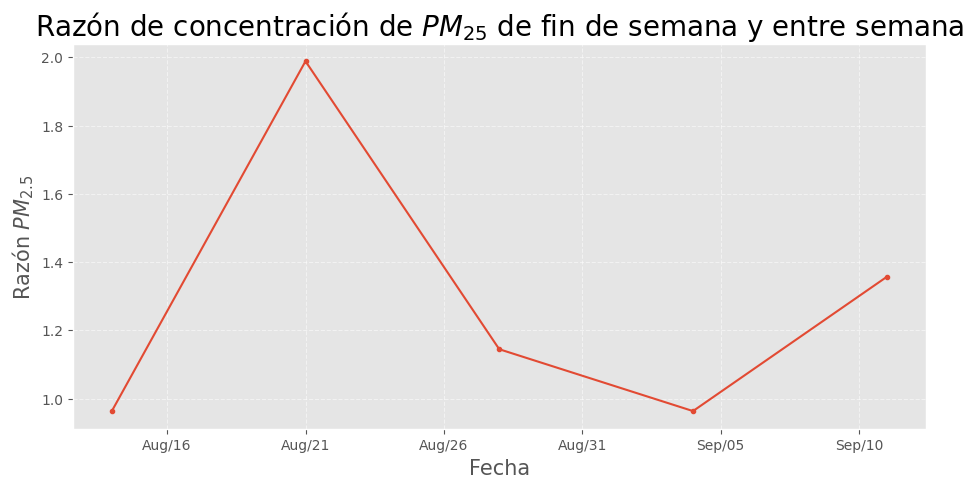

In [102]:
#Ahora vizualicemos los datos
fig, ax = plt.subplots(figsize=(11, 5))
ax.set_title("Razón de concentración de $PM_{25}$ de fin de semana y entre semana", fontsize=20)
ax.set_xlabel("Fecha", fontsize=15)
ax.set_ylabel("Razón $PM_{2.5}$", fontsize=15)
ax.plot(Ratios.date,Ratios.pm25_1, "-", marker="o", markersize=3)
ax.grid(alpha=0.5, linestyle="--")

#Podemos formatear el eje de las fechas para que se vea mejor
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.show()

> ¿Que representa un valor mayor que uno? ¿Un valor menor que uno?

> Puedes explicar el resultado ¿Obtuviste lo que esperabas?

### **Gráfica de bigotes**

Finalmente, vamos a graficar los datos obtenidos utilizando la función ```.boxplot()``` de Pandas. Esta función nos permite visualizar la distribución de los datos. En este caso, vamos a graficar la distribución de los ratios calculados para cada semana.


<div class="alert alert-block alert-info">
<b>¿Qué es un gráfico de bigotes?</b> Un gráfico de bigotes es un gráfico que muestra la distribución de los datos en <b>cuartiles</b>, resaltando el promedio y los valores atípicos. Las líneas que se extienden fuera de las cajas, llamadas "bigotes", muestran la <b>variabilidad</b> fuera del valor promedio de los datos y cualquier valor atípico que pueda estar presente en los datos. Los bigotes se pueden mostrar de diferentes maneras, dependiendo de la biblioteca que se utilice. En este caso, vamos a utilizar la función .boxplot() de Matplotlib

Por otra parte, ya hemos trabajado los cuartiles. Un cuartil es un valor que divide un conjunto de datos en cuatro partes iguales. Los cuartiles se pueden calcular utilizando la función ```.quantile()``` de Pandas. Por ejemplo, el primer cuartil es el primer conjunto de datos tras efectuar la división. Es decir, el 25% de los datos se encuentran por debajo del primer cuartil mientras que el 75% de los datos se encuentran por encima del primer cuartil. 
</div>  




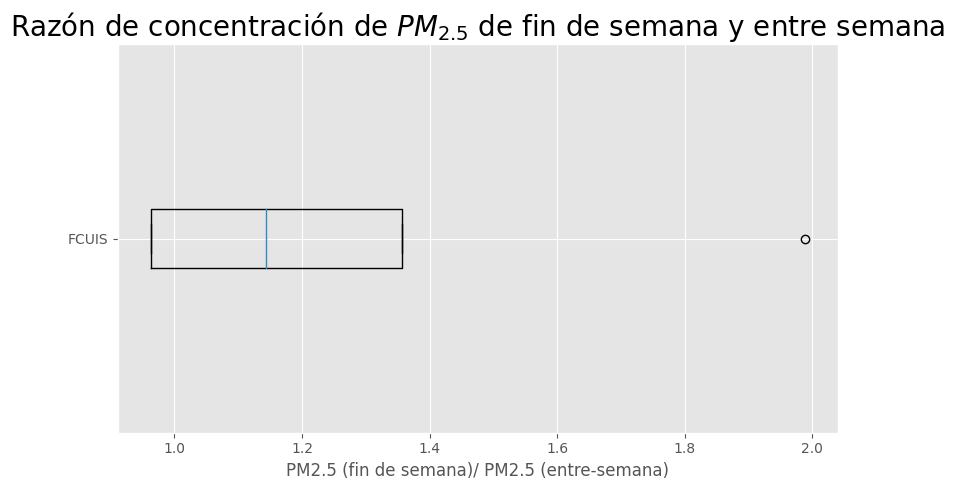

In [110]:
#Analicemos nuetro resultado con una gráfica de bigotes
plt.figure(figsize=(8,5))

#Iniciamos la gráfica de bigotes
plt.boxplot(x = Ratios['pm25_1'].values,
            vert=False, 
            #meanline=True, showmeans=True, 
           )
plt.xlabel("PM2.5 (fin de semana)/ PM2.5 (entre-semana)")
plt.title("Razón de concentración de $PM_{2.5}$ de fin de semana y entre semana", fontsize=20)
ax = plt.gca()
ax.set_yticklabels(['FCUIS'])
plt.tight_layout()


> ¿Qué conclusiones tenemos de este gráfico?

## Indice de Calidad de Aire

Hemos visto que las estaciones cuentan el **número de partículas** presentes en el aire y a partir de allí se determina la **concentración** de cada una de ellas. Sin embargo, no todas las partículas son iguales, algunas son más dañinas que otras. Por ejemplo, las partículas de menos de 2.5 micrómetros de diámetro son las más dañinas para la salud humana, ya que pueden penetrar profundamente en los pulmones y causar problemas respiratorios. Por otro lado, las partículas de menos de 10 micrómetros de diámetro pueden penetrar en los pulmones y causar problemas respiratorios y cardiovasculares. Además, una concentración no nos dice mucho respecto a qué tan dañado está el aire que respiramos.

Es por esto que surge la necesidad de establecer un **Índice de Calidad de Aire (ICA)** que nos permita conocer el estado del aire que respiramos. Este índice es un **valor representativo de los índices de contaminación más significativos**. Así, es posible clasificar la calidad del aire en seis categorías, cada una de ellas asociada a un color y a un valor del ICA, tal como vimos en la tabla de la sección [calidad del aire](../Monitoreo_Ambiental/Normatividad.md).

La fórmula para calcular el ICA es la siguiente:

$ {ICA}_{p} = \frac{I_{alto}-I_{bajo}}{PC_{alto}-PC_{bajo}}\times (C_{p}-PC_{bajo})+I_{bajo} , $

donde:
- ${ICA}_{p}$ es el índice de calidad del aire para el contaminante $p$.
- ${C_{p}}$ es la concentración del contaminante $p$.
- ${PC_{bajo}}$ es el punto de corte menor o igual a $C_{p}$.
- ${PC_{alto}}$ es el punto de corte mayor o igual a $C_{p}$.
- ${I_{bajo}}$ es el índice correspondiente al punto de corte ${PC_{bajo}}$.
- ${I_{alto}}$ es el índice correspondiente al punto de corte ${PC_{alto}}$.

Todos estos valores se pueden encontrar en la página del [IDEAM](https://web.archive.org/web/20220124024649/http://www.ideam.gov.co/documents/11769/641368/2.01+HM+Indice+calidad+aire.pdf/5130ffb3-a1bf-4d23-a663-b4c51327cc05).
